# WeatherPy

## Generate Cities List

In [83]:
# import dependencies
from citipy import citipy as cp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from config import api_key
import requests
from datetime import date
from scipy.stats import linregress

In [2]:
# initialize list to store cities
cities = []

# set number of samples (cities) to be collected
sample_size = 1500

# randomly generate long & lat values
latitudes = np.random.uniform(low=-90, high=90.00000001, size=(sample_size,))
longitudes = np.random.uniform(low=-180, high=180.00000001, size=(sample_size,))

In [3]:
# generate cities list using citipy
for x in range(sample_size):
    city_name = cp.nearest_city(latitudes[x],longitudes[x]).city_name + ", " + cp.nearest_city(latitudes[x],longitudes[x]).country_code
    
    # only add city name to list if it is unique
    if (city_name not in cities):
        cities.append(city_name)

# print number of cities in the final list
print(len(cities))

628


## Perform API Calls

In [4]:
# save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# build partial query URL
url = f"{base_url}appid={api_key}&units={units}&q="

In [18]:
# initialize lists to store response variables
real_lat = []
real_lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
final_city = []
country_code = []
date = []

date_of_execution = date.today().strftime("%m/%d/%y")

print("Beginning Data Retrieval\n-------------------------")

for index, city in enumerate(cities):
    try:
        city_response = requests.get(url + city).json()
        real_lat.append(city_response["coord"]["lat"])
        real_lng.append(city_response["coord"]["lon"])
        temp.append(city_response["main"]["temp_max"])
        humidity.append(city_response["main"]["humidity"])
        cloudiness.append(city_response["clouds"]["all"])
        wind_speed.append(city_response["wind"]["speed"])
        date.append(city_response["dt"])
        final_city.append(city.split(",")[0])
        country_code.append(city.split(",")[1])
        print(f"Processing Record {index+1} | {city}")
    except (KeyError):
        print(f"City {index+1} not found. Skipping... | {city}")

Beginning Data Retrieval
-------------------------
Processing Record 1 | busselton, au
Processing Record 2 | punta arenas, cl
Processing Record 3 | mahebourg, mu
Processing Record 4 | mackay, au
Processing Record 5 | homer, us
Processing Record 6 | tasiilaq, gl
Processing Record 7 | lavumisa, sz
Processing Record 8 | qasigiannguit, gl
Processing Record 9 | eureka, us
Processing Record 10 | male, mv
Processing Record 11 | carbonia, it
Processing Record 12 | orocue, co
Processing Record 13 | longyearbyen, sj
City 14 not found. Skipping... | faya, td
Processing Record 15 | naze, jp
Processing Record 16 | ekibastuz, kz
Processing Record 17 | korla, cn
Processing Record 18 | yerbogachen, ru
Processing Record 19 | ugoofaaru, mv
Processing Record 20 | georgetown, sh
Processing Record 21 | gouyave, gd
City 22 not found. Skipping... | illoqqortoormiut, gl
Processing Record 23 | hilo, us
Processing Record 24 | piacabucu, br
Processing Record 25 | bredasdorp, za
Processing Record 26 | vaini, to
P

Processing Record 214 | salinopolis, br
Processing Record 215 | benjamin hill, mx
Processing Record 216 | parabel, ru
Processing Record 217 | bilma, ne
Processing Record 218 | new norfolk, au
Processing Record 219 | kempsey, au
Processing Record 220 | millington, us
Processing Record 221 | hobyo, so
Processing Record 222 | garowe, so
Processing Record 223 | ostrovnoy, ru
Processing Record 224 | cabo san lucas, mx
Processing Record 225 | christchurch, nz
Processing Record 226 | riyadh, sa
Processing Record 227 | cap malheureux, mu
Processing Record 228 | mendi, et
City 229 not found. Skipping... | sovetskiy, tj
Processing Record 230 | san luis, gt
Processing Record 231 | valparaiso, cl
Processing Record 232 | yellowknife, ca
Processing Record 233 | hithadhoo, mv
Processing Record 234 | avarua, ck
Processing Record 235 | lebu, cl
Processing Record 236 | cherskiy, ru
Processing Record 237 | itarema, br
Processing Record 238 | timiryazevskiy, ru
Processing Record 239 | benjamin constant, b

Processing Record 427 | tual, id
Processing Record 428 | camacha, pt
Processing Record 429 | farmington, us
Processing Record 430 | san andres, co
Processing Record 431 | mandalgovi, mn
Processing Record 432 | koutsouras, gr
Processing Record 433 | barcelos, br
Processing Record 434 | shetpe, kz
Processing Record 435 | takoradi, gh
Processing Record 436 | abapo, bo
Processing Record 437 | cabinda, ao
Processing Record 438 | qixingtai, cn
Processing Record 439 | pangnirtung, ca
Processing Record 440 | luderitz, na
Processing Record 441 | san pedro buenavista, mx
Processing Record 442 | vao, nc
Processing Record 443 | lai, td
Processing Record 444 | hurghada, eg
City 445 not found. Skipping... | cagayan de tawi-tawi, ph
Processing Record 446 | klaksvik, fo
Processing Record 447 | sao felix do xingu, br
Processing Record 448 | colwyn bay, gb
Processing Record 449 | concordia, hn
Processing Record 450 | vallenar, cl
Processing Record 451 | yulara, au
Processing Record 452 | pacific grove, 

## Convert Raw Data to DataFrame

In [52]:
# create dataframe with data generated from API calls
weather_df = pd.DataFrame({"City": final_city, 
                           "Lat": real_lat, 
                           "Lng": real_lng, 
                           "Max Temp": temp, 
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Country": country_code,
                           "Date": date
                          })

# output dataframe to csv file
weather_df.to_csv("Output/weather_output.csv", index=False, header=True)

In [53]:
# display dataframe
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,51.04,80,93,8.55,au,1626875931
1,punta arenas,-53.1500,-70.9167,35.71,93,75,3.44,cl,1626875914
2,mahebourg,-20.4081,57.7000,70.09,83,75,18.41,mu,1626875954
3,mackay,-21.1500,149.2000,60.04,87,0,5.75,au,1626875954
4,homer,59.6425,-151.5483,55.08,90,100,1.99,us,1626875955
...,...,...,...,...,...,...,...,...,...
557,izhma,65.0083,53.9113,63.70,62,88,11.21,ru,1626876868
558,rawah,34.4816,41.9093,107.33,12,0,16.40,iq,1626876869
559,jawhar,2.7809,45.5005,82.92,59,61,23.47,so,1626876869
560,astoria,46.1879,-123.8313,57.85,94,1,3.44,us,1626876870


## Inspect the data and remove the cities where the humidity > 100%.

In [30]:
# inspect the basic statistical values of the dataframe, paying attention to make sure no max humidity over 100
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,18.583831,17.570557,71.419644,68.151246,56.813167,8.514502,1.626877e+09
std,33.648929,90.827241,15.184784,22.921479,39.204509,6.664924,2.310439e+02
min,-54.800000,-175.200000,28.060000,5.000000,0.000000,0.000000,1.626876e+09
25%,-8.240850,-62.978575,60.690000,56.000000,15.000000,3.565000,1.626876e+09
50%,20.683350,19.962850,73.945000,74.000000,70.000000,6.590000,1.626877e+09
75%,49.122125,101.099975,81.100000,86.000000,97.000000,11.482500,1.626877e+09
max,78.218600,178.416700,119.410000,100.000000,100.000000,51.290000,1.626877e+09


In [49]:
# get the indices of cities that have humidity over 100%
bad_data = []

if weather_df["Humidity"].max() > 100:
    bad_data = weather_df.loc[weather_df["Humidity"]>100, :].index.values
    print(bad_data)

In [50]:
# create new dataframe while dropping humidity outliers by index value
clean_weather_df = weather_df.drop(bad_data, inplace=False)
clean_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,18.583831,17.570557,71.419644,68.151246,56.813167,8.514502,1.626877e+09
std,33.648929,90.827241,15.184784,22.921479,39.204509,6.664924,2.310439e+02
min,-54.800000,-175.200000,28.060000,5.000000,0.000000,0.000000,1.626876e+09
25%,-8.240850,-62.978575,60.690000,56.000000,15.000000,3.565000,1.626876e+09
50%,20.683350,19.962850,73.945000,74.000000,70.000000,6.590000,1.626877e+09
75%,49.122125,101.099975,81.100000,86.000000,97.000000,11.482500,1.626877e+09
max,78.218600,178.416700,119.410000,100.000000,100.000000,51.290000,1.626877e+09


## Plotting the Data

In [133]:
def create_scatter(yvar, title, ylabel, fig_name):
    plt.scatter(clean_weather_df["Lat"],clean_weather_df[yvar],color="teal", edgecolors="black")
    plt.title("City Latitude vs " + title + " (" + date_of_execution + ")")
    plt.ylabel(ylabel)
    plt.xlabel("Latitude")
    plt.grid()
    plt.savefig("Output/Lat_v_" + fig_name + ".png")
    return plt.show()

### Latitude vs. Temperature Plot

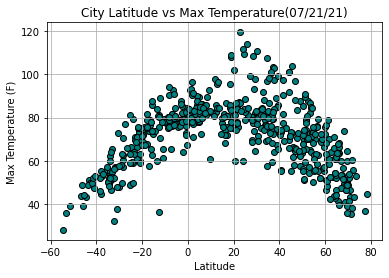

In [134]:
create_scatter("Max Temp", "Max Temperature", "Max Temperature (F)", "Temp")

### Latitude vs. Humidity Plot

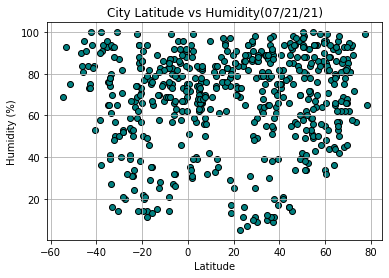

In [135]:
create_scatter("Humidity", "Humidity", "Humidity (%)", "Humid")

### Latitude vs. Cloudiness Plot

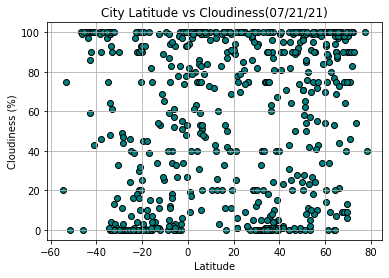

In [136]:
create_scatter("Cloudiness", "Cloudiness", "Cloudiness (%)", "Cloud")

### Latitude vs. Wind Speed Plot

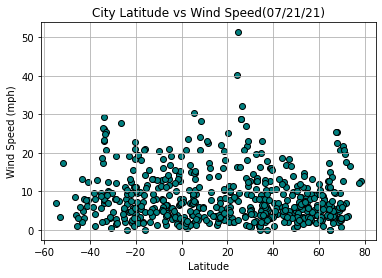

In [137]:
create_scatter("Wind Speed", "Wind Speed", "Wind Speed (mph)", "Wind")

## Linear Regression

In [84]:
northern_hem = clean_weather_df.loc[clean_weather_df["Lat"]>=0,:]
southern_hem = clean_weather_df.loc[clean_weather_df["Lat"]<0,:]

In [145]:
def scatter_and_regression(x_axis, y_axis, title, ylabel, fig_name, hemi, eq_loc):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_axis, regress_values, color="darkblue")
    plt.annotate(line_eq, eq_loc, color="darkblue", size=15)
    
    plt.scatter(x_axis, y_axis, color="coral")
    plt.title(hemi + " Hemisphere: City Latitude vs " + title + " (" + date_of_execution + ")")
    plt.ylabel(ylabel)
    plt.xlabel("Latitude")
    plt.savefig("Output/Lat_v_" + fig_name + ".png")
    print(f"The r-value is: {round(rvalue,2)}")
    return plt.show()

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.66


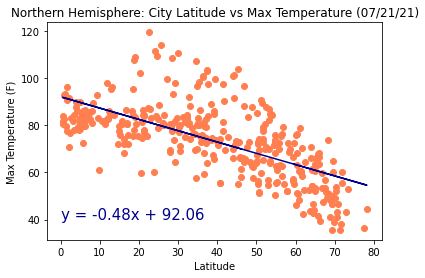

In [146]:
scatter_and_regression(northern_hem["Lat"], northern_hem["Max Temp"], 
                       "Max Temperature", "Max Temperature (F)", 
                       "Temp_North", "Northern", (0,40))

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.83


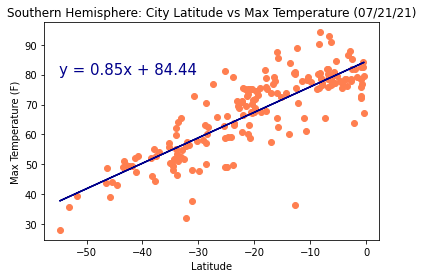

In [148]:
scatter_and_regression(southern_hem["Lat"], southern_hem["Max Temp"], 
                       "Max Temperature", "Max Temperature (F)", 
                       "Temp_South", "Southern", (-55,80))

### Max Temp vs. Latitude Analysis

In the Northern Hemisphere, the r-value demonstrates a moderate, negative relationship between latitude and max temperature. This means that as you approach the equator (Latitude = 0), the temperature tends to be higher. In the Southern Hemisphere, the r-value demonstrates a strong, positive relationship between latitude and max temperature. This means that as you approach the equator, the temperature tends to be higher. Both graphs are simulating a similar relationship: the highest temps tend to occur nearest the equator, while the lowest temps tend to occur furthest away from the equator.

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1


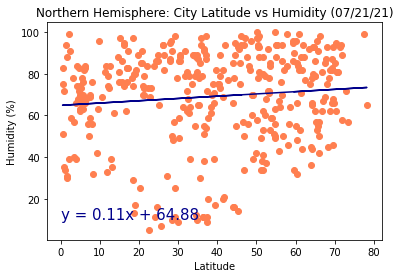

In [149]:
scatter_and_regression(northern_hem["Lat"], northern_hem["Humidity"], 
                       "Humidity", "Humidity (%)", 
                       "Humid_North", "Northern", (0,10))

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.03


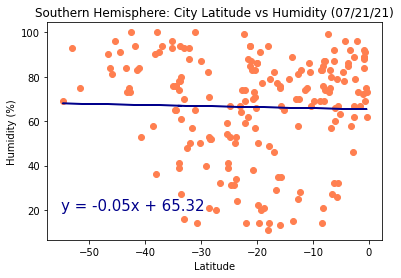

In [150]:
scatter_and_regression(southern_hem["Lat"], southern_hem["Humidity"], 
                       "Humidity", "Humidity (%)", 
                       "Humid_South", "Southern", (-55,20))

### Humidity vs. Latitude Analysis

In both the Northern and Southern Hemispheres, the r-values demonstrate a weak/non-existent relationship between latitude and humidity. This means that there is no evidence here to support a relationship between proximity to the equator and humidity.

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02


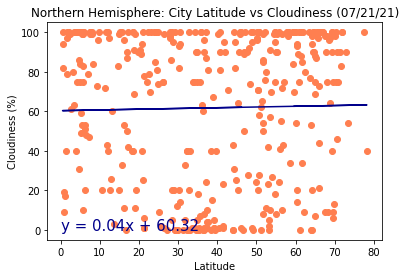

In [151]:
scatter_and_regression(northern_hem["Lat"], northern_hem["Cloudiness"], 
                       "Cloudiness", "Cloudiness (%)", 
                       "Cloud_North", "Northern", (0,0))

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.09


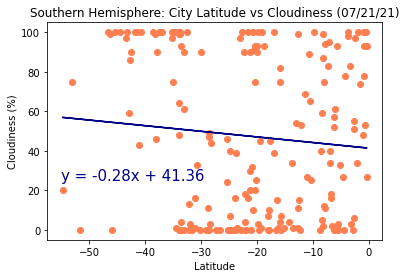

In [152]:
scatter_and_regression(southern_hem["Lat"], southern_hem["Cloudiness"], 
                       "Cloudiness", "Cloudiness (%)", 
                       "Cloud_South", "Southern", (-55,25))

### Cloudiness vs. Latitude Analysis

In both the Northern and Southern Hemispheres, the r-values demonstrate a weak/non-existent relationship between latitude and cloudiness. This means that there is no evidence here to support a relationship between proximity to the equator and cloudiness.

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.09


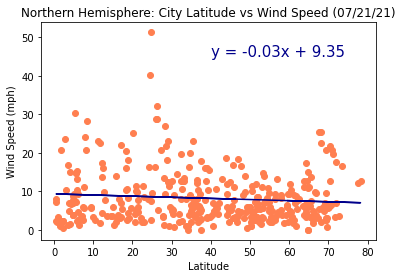

In [153]:
scatter_and_regression(northern_hem["Lat"], northern_hem["Wind Speed"], 
                       "Wind Speed", "Wind Speed (mph)", 
                       "Wind_North", "Northern", (40,45))

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.02


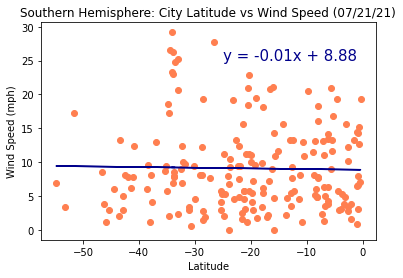

In [154]:
scatter_and_regression(southern_hem["Lat"], southern_hem["Wind Speed"], 
                       "Wind Speed", "Wind Speed (mph)", 
                       "Wind_South", "Southern", (-25,25))

### Wind Speed vs. Latitude Analysis

In both the Northern and Southern Hemispheres, the r-values demonstrate a weak/non-existent relationship between latitude and wind speed. This means that there is no evidence here to support a relationship between proximity to the equator and wind speed. Interestingly, the y-intercepts for both the Northern and Southern hemispheres are around 9mph, and since the regression lines are very close to flat, we can infer that the average wind speeds for both hemispheres are very close (and around 9mph) at the given time of data pull.